In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
flow= pd.read_csv('../opt_hype/0058290.txt', index_col=0, sep='\t')

In [3]:
flow = flow.drop(flow.index[0])

In [4]:
# Ensure all values are numeric
flow['cout'] = pd.to_numeric(flow['cout'], errors='coerce')
flow['rout'] = pd.to_numeric(flow['rout'], errors='coerce')

In [5]:
# Drop any rows where rout has a value of -9999
flow = flow[flow['rout'] != -9999]

In [6]:
# Sort the DataFrame by 'rout' in descending order
flow_sorted = flow.sort_values(by='rout', ascending=False)

# Identify the indices of the 100 largest values
indices_to_drop = flow_sorted.head(100).index

# Drop the rows with these indices
flow_filtered = flow.drop(indices_to_drop)

In [7]:
# Drop any rows with NaN values resulting from non-numeric entries
flow.dropna(inplace=True)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(flow['rout'], flow['cout'])

# Calculate R-squared
r_squared = r_value**2

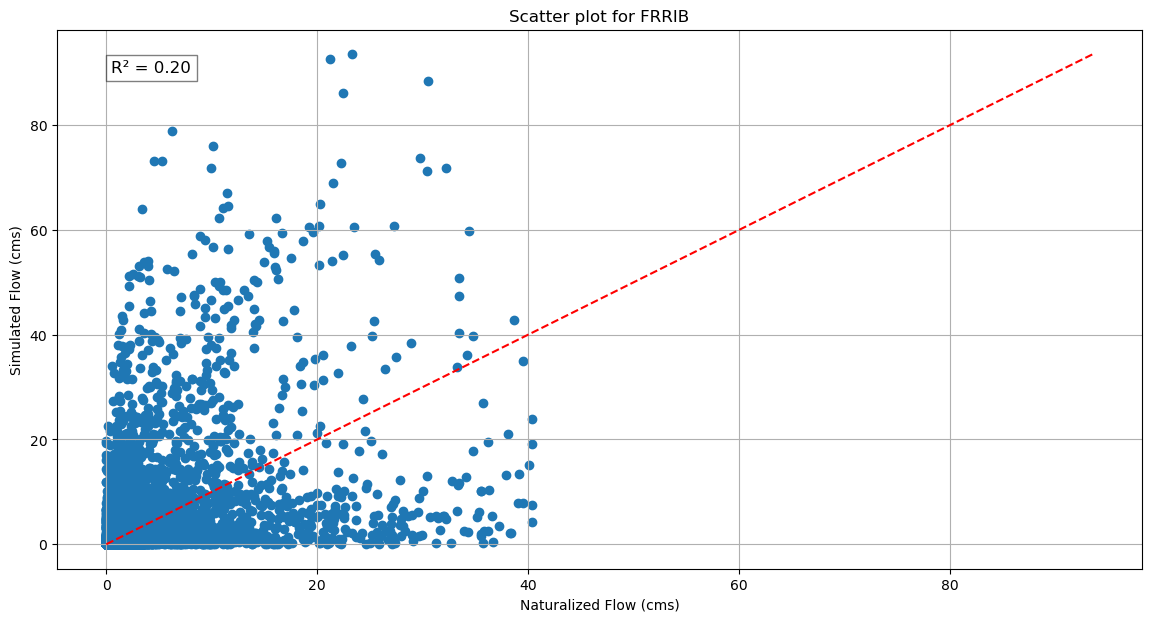

In [8]:
# Plotting
plt.figure(figsize=(14, 7))
plt.scatter(flow['rout'], flow['cout'])
plt.title('Scatter plot for FRRIB')
plt.xlabel('Naturalized Flow (cms)')
plt.ylabel('Simulated Flow (cms)')
plt.grid(True)

# Plotting the 1:1 line
min_val = min(flow['rout'].min(), flow['cout'].min())
max_val = max(flow['rout'].max(), flow['cout'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Display the R-squared value on the plot
plt.text(0.05, 0.92, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Save the plot as a PNG file
plt.savefig('./scatter_plot_FRRIB.png', dpi=300)

plt.show()